In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Giving path directory to augment images
mainDirectory = "C:/Users/seyed/Music/Brain Tumor - non Augmented/"

In [3]:
# Resizing all the images to the same resolution
imageHeight, imageWidth = 256, 256

In [4]:
# Creating to list to save the images
with_Tumor = []
with_No_Tumor = []

In [5]:
# Appending the data to a list
for classes in os.listdir(mainDirectory):
    pathDirectory = os.path.join(mainDirectory, classes)
    for image in os.listdir(path=pathDirectory):
        # Taking images of all image directories
        image_array = cv2.imread(os.path.join(pathDirectory, image))
        # Resizing the images to 256 * 256
        image_array = cv2.resize(image_array, (imageHeight, imageWidth))
        if classes == "Yes":
            with_Tumor.append(image_array)
        elif classes == "No":
            with_No_Tumor.append(image_array)

In [6]:
# Convert lists to numpy arrays
with_Tumor = np.array(with_Tumor)
with_No_Tumor = np.array(with_No_Tumor)

In [7]:
# size of tumor dataset
with_Tumor.shape 

(6678, 256, 256, 3)

In [8]:
# size of no tumor dataset
with_No_Tumor.shape 

(3598, 256, 256, 3)

In [9]:
# Data augmentation
generatedData = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.05,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="constant",
    shear_range=0.15,
    cval=0
)

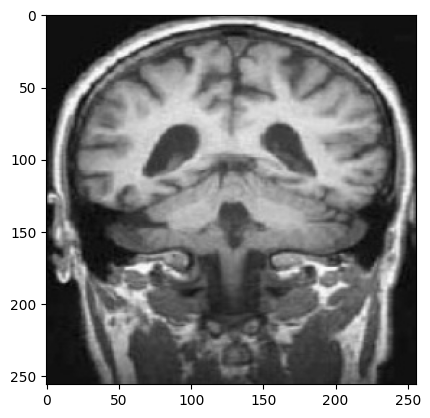

In [10]:
# Plotting the images whether to check it has generated properly
plt.imshow(with_No_Tumor[2300])

In [11]:
# Create a directory to save augmented images
augmented_directory = "C:/Users/seyed/Music/Brain Tumor - Augmented/" 
os.makedirs(augmented_directory, exist_ok=True)

In [12]:
# Function to save augmented images
def save_augmented_images(images, save_directory, prefix, n=5):
    for i in range(len(images)):
        image = images[i]
        augmented_images = np.expand_dims(image, 0)
        for j in range(n):
            augmented_image = generatedData.random_transform(image)
            augmented_image = np.expand_dims(augmented_image, 0)
            cv2.imwrite(os.path.join(save_directory, f"{prefix}_{i}_{j}.jpg"), augmented_image[0])


In [13]:
# Save augmented images for each class
save_augmented_images(with_Tumor, os.path.join(augmented_directory, "Yes/"), 'Tumor', n=5)
save_augmented_images(with_No_Tumor, os.path.join(augmented_directory, "No/"), 'No_Tumor', n=5)